In [1]:
# Common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
SEED = 0

# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')

# Import test and train data
df_train = pd.read_csv('../input/train.csv', index_col='Id')
df_test = pd.read_csv('../input/test.csv', index_col='Id')

In [2]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV

#Crossvalidation function
def CrossValidate(estimator, param_grid, x_train, y_train):

    n_jobs = 5
    #ShuffleSplit to randomly shuffle and select Train and CV sets for each iteration. 
    cv = ShuffleSplit(x_train.shape[0], n_iter=1, test_size=0.2)

    #GridSearch to get the best parameters
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs, scoring='accuracy',verbose=4) #scoring='mean_squared_error'

    #Fitting the Classifier
    classifier.fit(x_train, y_train)

    #Printing best Parameters
    print "Best Estimator learned through GridSearch"
    print classifier.best_estimator_
    
    return cv, classifier.best_estimator_

/Users/ram/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ram/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#Feature Importance
def importances(estimator, col_array, title):

# Calculate the feature ranking - Top 10
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]

    print "%s Top 20 Important Features\n" %title

    for f in range(20):
        print("%d. %s   (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]]))
    
#Mean Feature Importance
    print "\nMean Feature Importance %.6f" %np.mean(importances)
    
#Plot the feature importances of the forest
    indices=indices[:10]
    plt.figure()
    plt.title(title+" Top 10 Feature importances")
    plt.bar(range(10), importances[indices],
            color="gr", align="center")
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90)
    plt.xlim([-1, 10])
    plt.show()

In [4]:
from sklearn.cross_validation import ShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.ix[:,:-1].values, df_train.ix[:,-1:].values.ravel(),test_size=0.1)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(13608, 54) (1512, 54) (13608,) (1512,)


Fitting 1 folds for each of 18 candidates, totalling 18 fits
[CV] n_estimators=100, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=1000, max_depth=8, min_samples_leaf=2 ..............
[CV] n_estimators=100, max_depth=8, min_samples_leaf=6 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=6 ...............
[CV]  n_estimators=100, max_depth=8, min_samples_leaf=2, score=0.760838 -   2.7s
[CV] n_estimators=1000, max_depth=8, min_samples_leaf=6 ..............
[CV]  n_estimators=100, max_depth=8, min_samples_leaf=6, score=0.757531 -   2.6s
[CV] n_estimators=100, max_depth=10, min_samples_leaf=2 ..............
[CV]  n_estimators=100, max_depth=10, min_samples_leaf=2, score=0.770757 -   3.2s
[CV] n_estimators=500, max_depth=10, min_samples_leaf=2 ..............
[CV]  n_estimators=500, max_depth=8, min_samples_leaf=6, score=0.740632 -  13.8s
[CV] n_estimators=1000, max_depth=10, min_samp

[Parallel(n_jobs=5)]: Done  14 out of  18 | elapsed:   48.2s remaining:   13.8s


[CV]  n_estimators=1000, max_depth=10, min_samples_leaf=6, score=0.781043 -  30.1s
[CV]  n_estimators=500, max_depth=12, min_samples_leaf=6, score=0.803086 -  16.0s
[CV]  n_estimators=1000, max_depth=12, min_samples_leaf=2, score=0.793534 -  27.4s
[CV]  n_estimators=1000, max_depth=12, min_samples_leaf=6, score=0.798310 -  19.1s


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.1min finished


Best Estimator learned through GridSearch
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Estimator Parameters
---------------------------
n_estimators: 500
max_depth: 12
RFC GS Feature Importances Top 20 Important Features

1. Elevation   (0.259182)
2. Horizontal_Distance_To_Roadways   (0.085053)
3. Wilderness_Area4   (0.071959)
4. Horizontal_Distance_To_Hydrology   (0.052274)
5. Horizontal_Distance_To_Fire_Points   (0.052136)
6. Hillshade_9am   (0.038388)
7. Vertical_Distance_To_Hydrology   (0.036740)
8. Soil_Type10   (0.035578)
9. Soil_Type38   (0.031217)
10. Wilderness_Area1   (0.030880)
11. Aspect   (0.029789)


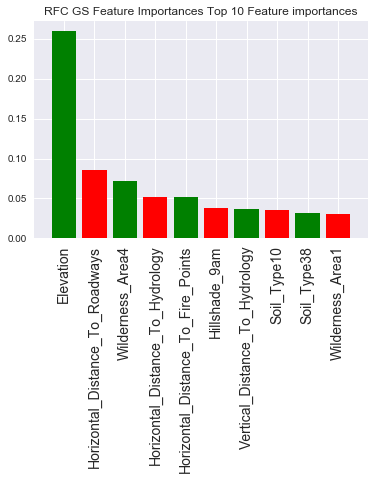

Training Score: 0.89
Test Score: 0.81


In [6]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
param_grid={'n_estimators': [100, 500, 1000],
            'max_depth': [8, 10, 12],
            'min_samples_leaf': [2,6]
           }

RFCv,RFC_estimator=CrossValidate(RFC, param_grid, X_train, y_train)

print "Best Estimator Parameters"
print"---------------------------"
print "n_estimators: %d" %RFC_estimator.n_estimators
print "max_depth: %d" %RFC_estimator.max_depth

#Feature Importances for Random Forest Model (Grid Search)
importances(RFC_estimator, df_train, "RFC GS Feature Importances")

print "Training Score: %.2f" %RFC_estimator.score(X_train,y_train)
print "Test Score: %.2f" %RFC_estimator.score(X_test,y_test)

Fitting 1 folds for each of 18 candidates, totalling 18 fits
[CV] n_estimators=100, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=1000, max_depth=8, min_samples_leaf=2 ..............
[CV] n_estimators=100, max_depth=8, min_samples_leaf=6 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=6 ...............
[CV]  n_estimators=100, max_depth=8, min_samples_leaf=2, score=0.677810 -   2.0s
[CV] n_estimators=1000, max_depth=8, min_samples_leaf=6 ..............
[CV]  n_estimators=100, max_depth=8, min_samples_leaf=6, score=0.685525 -   2.0s
[CV] n_estimators=100, max_depth=10, min_samples_leaf=2 ..............
[CV]  n_estimators=100, max_depth=10, min_samples_leaf=2, score=0.714181 -   2.3s
[CV] n_estimators=500, max_depth=10, min_samples_leaf=2 ..............
[CV]  n_estimators=500, max_depth=8, min_samples_leaf=2, score=0.703159 -  11.3s
[CV] n_estimators=1000, max_depth=10, min_samp

[Parallel(n_jobs=5)]: Done  14 out of  18 | elapsed:   54.2s remaining:   15.5s


[CV]  n_estimators=500, max_depth=12, min_samples_leaf=6, score=0.734754 -  17.5s
[CV]  n_estimators=1000, max_depth=10, min_samples_leaf=6, score=0.710140 -  37.7s
[CV]  n_estimators=1000, max_depth=12, min_samples_leaf=2, score=0.765614 -  32.0s
[CV]  n_estimators=1000, max_depth=12, min_samples_leaf=6, score=0.735856 -  19.4s


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.2min finished


Best Estimator learned through GridSearch
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=12, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Estimator Parameters
---------------------------
n_estimators: 1000
max_depth: 12
ETC GS Feature Importances Top 20 Important Features

1. Elevation   (0.165182)
2. Wilderness_Area4   (0.133847)
3. Soil_Type10   (0.062132)
4. Soil_Type38   (0.053732)
5. Soil_Type3   (0.051410)
6. Soil_Type39   (0.047718)
7. Horizontal_Distance_To_Roadways   (0.046147)
8. Wilderness_Area1   (0.045221)
9. Wilderness_Area3   (0.036611)
10. Soil_Type40   (0.029918)
11. Soil_Type4   (0.027828)
12. Horizontal_Distance_To_Hydrology   (0.025695)
13. Horizontal_Distance

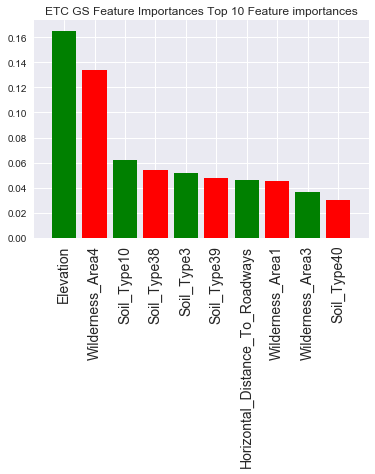

Training Score: 0.80
Test Score: 0.75


In [7]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
param_grid={'n_estimators': [100, 500, 1000],
            'max_depth': [8, 10, 12],
            'min_samples_leaf': [2,6]
           }

ETCv,ETC_estimator=CrossValidate(ETC, param_grid, X_train, y_train)

print "Best Estimator Parameters"
print"---------------------------"
print "n_estimators: %d" %ETC_estimator.n_estimators
print "max_depth: %d" %ETC_estimator.max_depth

#Feature Importances for Extra Trees Model (Grid Search)
importances(ETC_estimator, df_train, "ETC GS Feature Importances")

print "Training Score: %.2f" %ETC_estimator.score(X_train,y_train)
print "Test Score: %.2f" %ETC_estimator.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABC=GradientBoostingClassifier()
param_grid={'n_estimators': [100, 500, 1000],
            'max_depth': [8, 10, 12],
            'min_samples_leaf': [2,6]
           }

ABCv,ABC_estimator=CrossValidate(ABC, param_grid, X_train, y_train)

print "Best Estimator Parameters"
print"---------------------------"
print "n_estimators: %d" %ABC_estimator.n_estimators
print "max_depth: %d" %ABC_estimator.max_depth

#Feature Importances for Extra Trees Model (Grid Search)
importances(ABC_estimator, df_train, "ABC GS Feature Importances")

print "Training Score: %.2f" %ABC_estimator.score(X_train,y_train)
print "Test Score: %.2f" %ABC_estimator.score(X_test,y_test)

Fitting 1 folds for each of 18 candidates, totalling 18 fits
[CV] n_estimators=100, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=2 ...............
[CV] n_estimators=1000, max_depth=8, min_samples_leaf=2 ..............
[CV] n_estimators=100, max_depth=8, min_samples_leaf=6 ...............
[CV] n_estimators=500, max_depth=8, min_samples_leaf=6 ...............


In [12]:

clfs = [
        RFC_estimator,
        ETC_estimator,
        GBC_estimator
      ]
    
# Pre-allocate the data
X_blend_train=[]
X_blend_test=[]
X_blend_testcsv=[]

print 'X_train.shape = %s' % (str(X_train.shape))
print 'X_test.shape = %s' % (str(X_test.shape))
#print 'blend_train.shape = %s' % (str(X_blend_train.shape))
#print 'blend_test.shape = %s' % (str(X_blend_test.shape))

for j, clf in enumerate(clfs):
        print 'Training classifier [%s]' % (j)
        X_blend_train.append(clf.predict(X_train))
        X_blend_test.append(clf.predict(X_test))
        X_blend_testcsv.append(clf.predict(df_test.values))


X_blend_train = np.array(X_blend_train).T
X_blend_test = np.array(X_blend_test).T
X_blend_testcsv = np.array(X_blend_testcsv).T

print 'End'

X_train.shape = (13608, 54)
X_test.shape = (1512, 54)
Training classifier [0]
Training classifier [1]
Training classifier [2]
End


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lo=LogisticRegression().fit(X_blend_train, y_train)

y_pred=lo.predict(X_blend_test)

print "Ensemble Learning - Blending Random Forests & Extra Trees Results"
print "-----------------------------------------------------------------"
print "Blended Training Score: %.2f" %lo.score(X_blend_train,y_train)
print "Blended Test Score: %.2f" %lo.score(X_blend_test,y_test)
print
print "Classification Report - Blended Test"
print metrics.classification_report(y_test, y_pred)

Ensemble Learning - Blending Random Forests & Extra Trees Results
-----------------------------------------------------------------
Blended Training Score: 0.97
Blended Test Score: 0.84

Classification Report - Blended Test
             precision    recall  f1-score   support

          1       0.80      0.79      0.80       195
          2       0.80      0.58      0.67       220
          3       0.71      0.82      0.76       206
          4       0.95      0.96      0.96       213
          5       0.91      0.90      0.91       226
          6       0.81      0.87      0.84       239
          7       0.92      0.98      0.95       213

avg / total       0.85      0.84      0.84      1512



In [ ]:
#Make a copy of the test.csv file
temp=df_test.copy()

#Run Predictions on test.csv
temp['Cover_Type']=lo.predict(X_blend_testcsv)

#Create Submissions csv file
temp=temp['Cover_Type']
temp.to_csv('Result1.csv', header=True)